# Heart Disease Prediction Using Machine Learning 

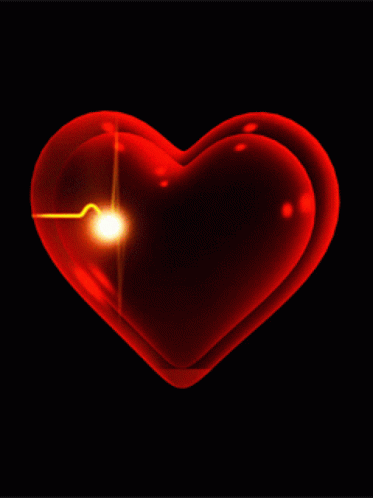

# Project Objective
Heart Disease Prediction using Machine Learning
Heart disease prevention is critical, and data-driven prediction systems can significantly aid in early diagnosis and treatment. Machine Learning offers accurate prediction capabilities, enhancing healthcare outcomes.
In this project, I analyzed a heart disease dataset with appropriate preprocessing. Multiple classification algorithms were implemented in Python using Scikit-learn and Keras to predict the presence of heart disease.

**Algorithms Used**:
- Logistic Regression
- Naive Bayes
- Support Vector Machine (Linear)
- K-Nearest Neighbors
- Decision Tree
- Random Forest
- XGBoost
- Artificial Neural Network (1 Hidden Layer, Keras)

# Step 1 : Import Required Modules 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')
print('All Modules Loaded Successfully!')

All Modules Loaded Successfully!


# Step 2 : Loading Data 

In [3]:
url = '''https://github.com/Nakulgarg12/heart_prediction_model/blob/main/heart.csv?raw=true'''
df = pd.read_csv(url)
print('Done')

Done


# Step 3 : Understanding Data using EDA

In [4]:
#3.1 Data head
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [5]:
#3.2 Data tail 
df.tail()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0

In [9]:
#3.3 Data shape
df.shape

(303, 14)

In [10]:
#3.4 Data info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
#3.5 Data columns 
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

###### 3.6 Column Desc
- **age**:			``age``
- **sex**:			``1: male, 0: female``
- **cp**:			``chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic``
- **trestbps**:			``resting blood pressure``
- **chol**:			`` serum cholestoral in mg/dl``
- **fbs**:			``fasting blood sugar > 120 mg/dl``
- **restecg**:			``resting electrocardiographic results (values 0,1,2)``
- **thalach**:			 ``maximum heart rate achieved``
- **exang**:			``exercise induced angina``
- **oldpeak**:			``oldpeak = ST depression induced by exercise relative to rest``
- **slope**:			``the slope of the peak exercise ST segment``
- **ca**:			``number of major vessels (0-3) colored by flourosopy``
- **thal**:			``thal: 3 = normal; 6 = fixed defect; 7 = reversable defect``

In [12]:
# Domain Knowledge is required for this level of project 

###### 3.7 Checking Null Counts 

In [13]:
df.isna().sum()
# No null value found 
# in case of null:Remove,Fill,Replace,Drop 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

###### 3.8 Column Stats

In [14]:
df.describe().round(2)

age     sex      cp  trestbps    chol     fbs  restecg  thalach  \
count  303.00  303.00  303.00    303.00  303.00  303.00   303.00   303.00   
mean    54.37    0.68    0.97    131.62  246.26    0.15     0.53   149.65   
std      9.08    0.47    1.03     17.54   51.83    0.36     0.53    22.91   
min     29.00    0.00    0.00     94.00  126.00    0.00     0.00    71.00   
25%     47.50    0.00    0.00    120.00  211.00    0.00     0.00   133.50   
50%     55.00    1.00    1.00    130.00  240.00    0.00     1.00   153.00   
75%     61.00    1.00    2.00    140.00  274.50    0.00     1.00   166.00   
max     77.00    1.00    3.00    200.00  564.00    1.00     2.00   202.00   

        exang  oldpeak   slope      ca    thal  target  
count  303.00   303.00  303.00  303.00  303.00  303.00  
mean     0.33     1.04    1.40    0.73    2.31    0.54  
std      0.47     1.16    0.62    1.02    0.61    0.50  
min      0.00     0.00    0.00    0.00    0.00    0.00  
25%      0.00     0.00    1.00    0.00    2.00    0.00  
50%      0.00     0.80    1.00    0.00    2.00    1.00  
75%      1.00     1.60    2.00    1.00    3.00    1.00  
max      1.00     6.20    2.00    4.00    3.00    1.00

###### 3.9 Each column univariate analysis

In [15]:
for i in df:
    print(f'column_{i}',df[i].unique())
    print('.....................',end ='\n\n')

column_age [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
.....................

column_sex [1 0]
.....................

column_cp [3 2 1 0]
.....................

column_trestbps [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
.....................

column_chol [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164

###### 3.10 Each Numerical Features Hist plot Distribution 

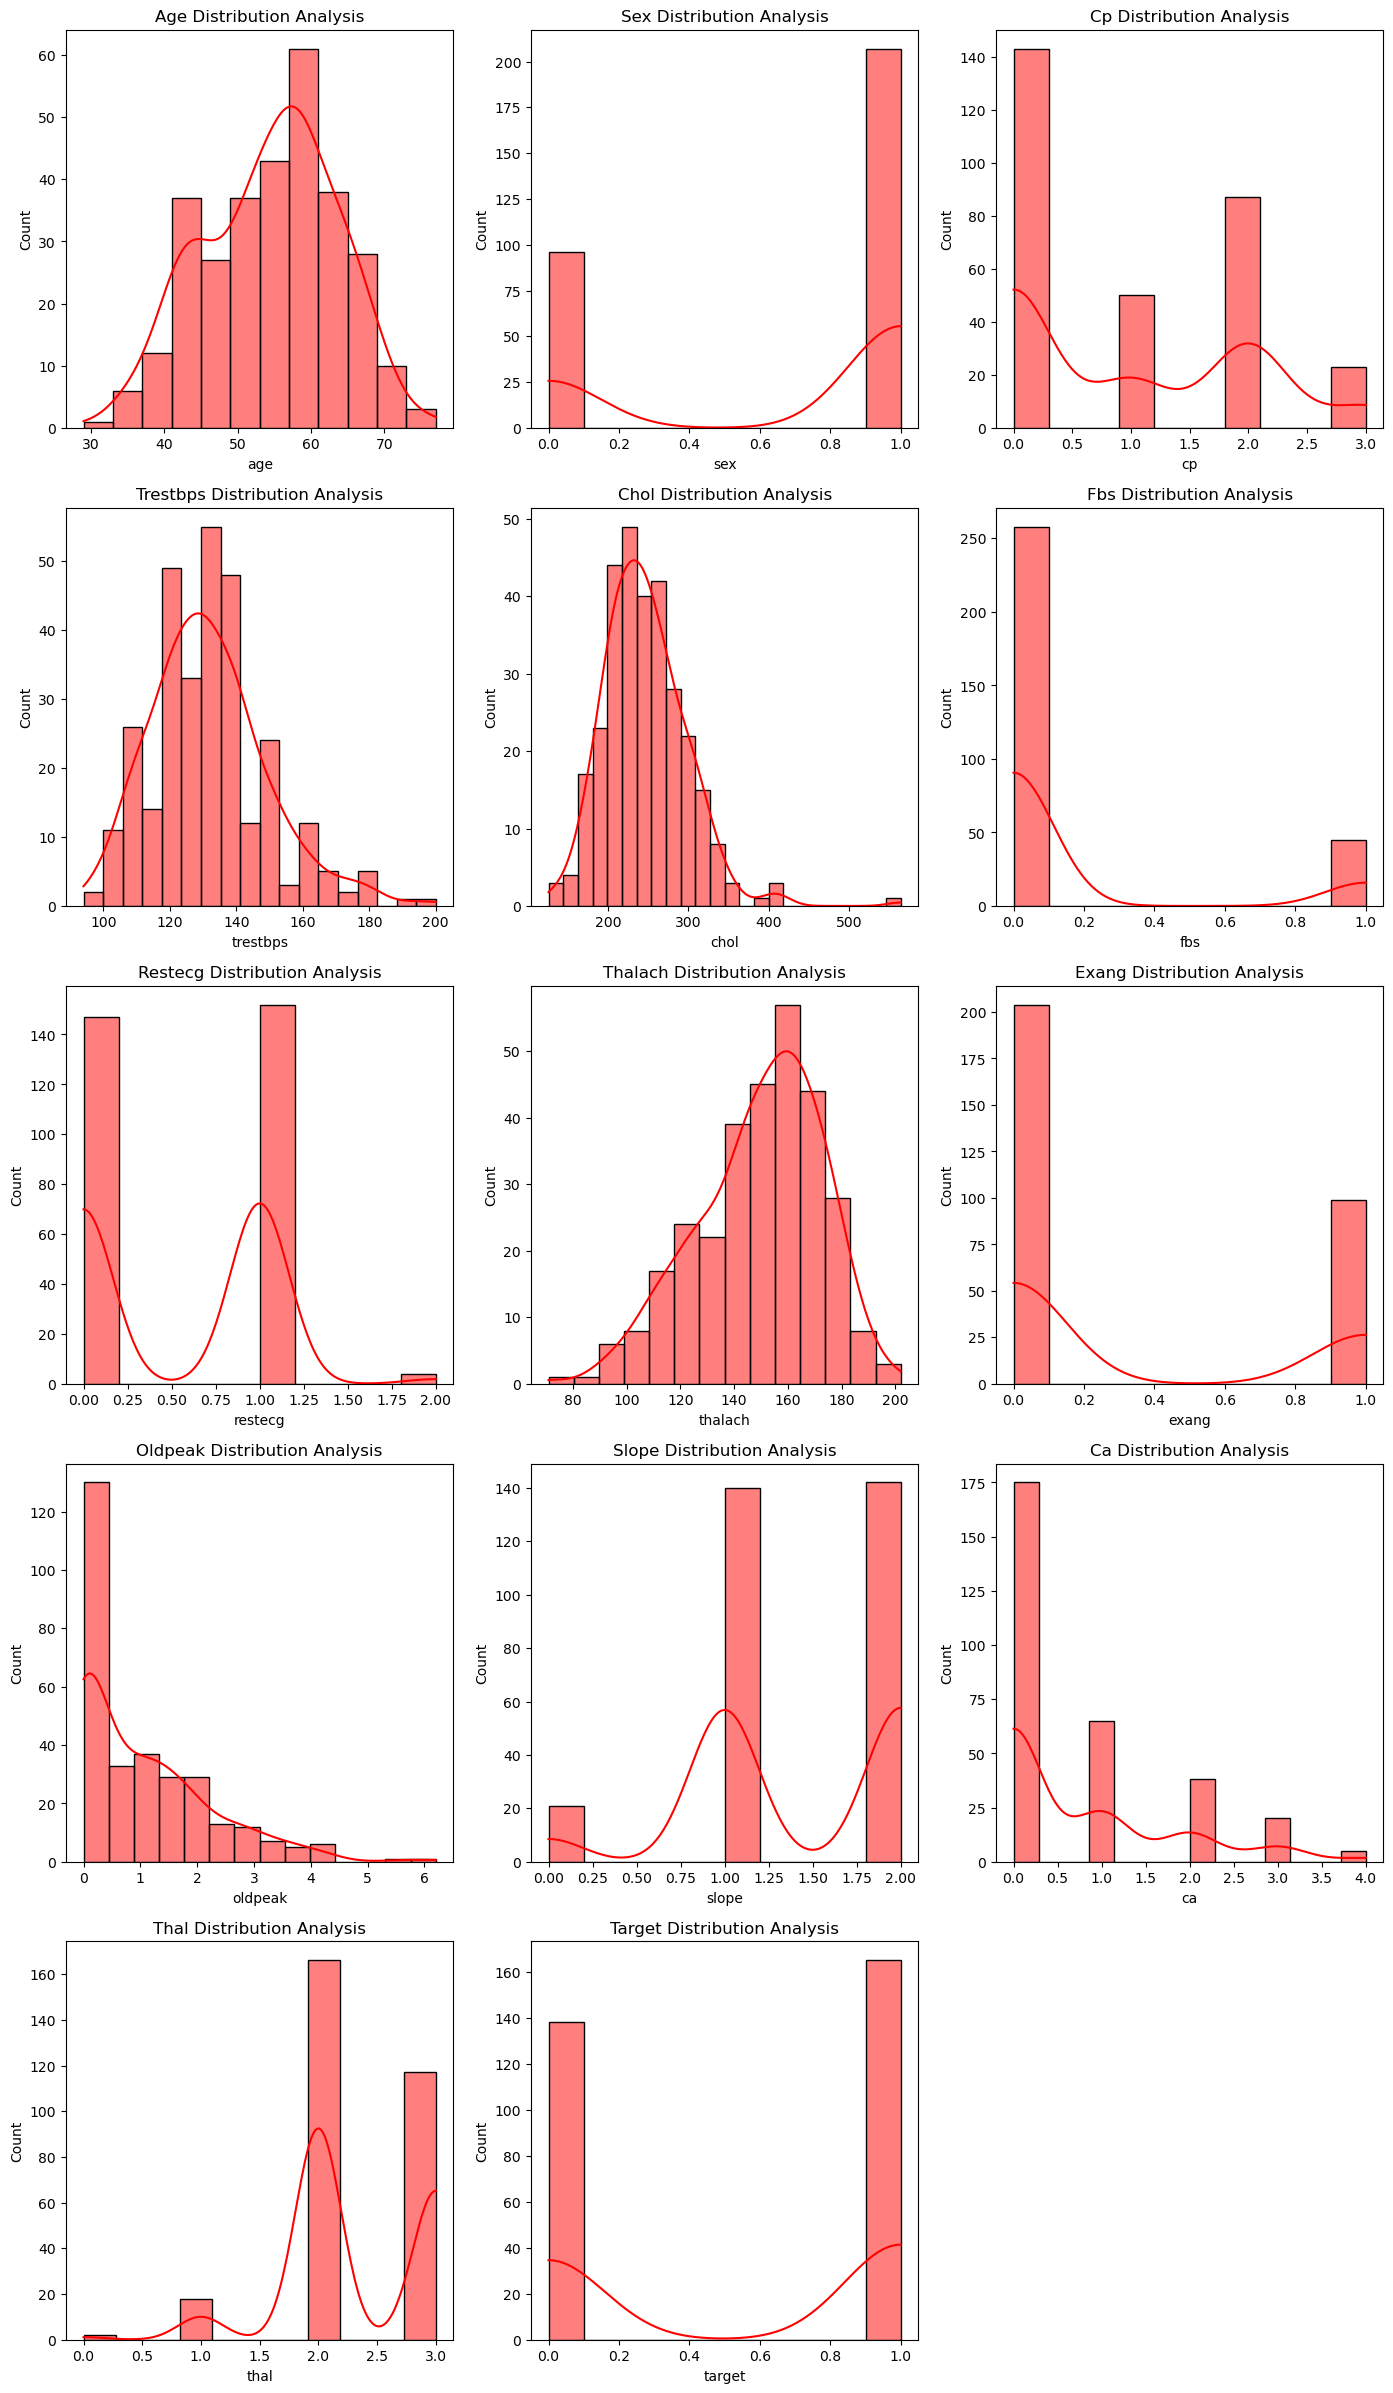

In [16]:
r = 5
c = 3
plt.figure(figsize=(17,30))
for i,j in enumerate(df):
    plt.subplot(r,c,i+1)
    plt.title(f'{j.title()} Distribution Analysis',color = 'black')
    sns.histplot(df[j],kde = True,color = 'r')
plt.savefig('All Numerical Distribution Analysis.jpeg',dpi=500)
plt.show()

In [17]:
# Target col is not that much imbalance,we can proceed,if imbalance found we need to balance using sampling 

###### 3.11 Bivariate Analysis,To check Correlation of features vs target 

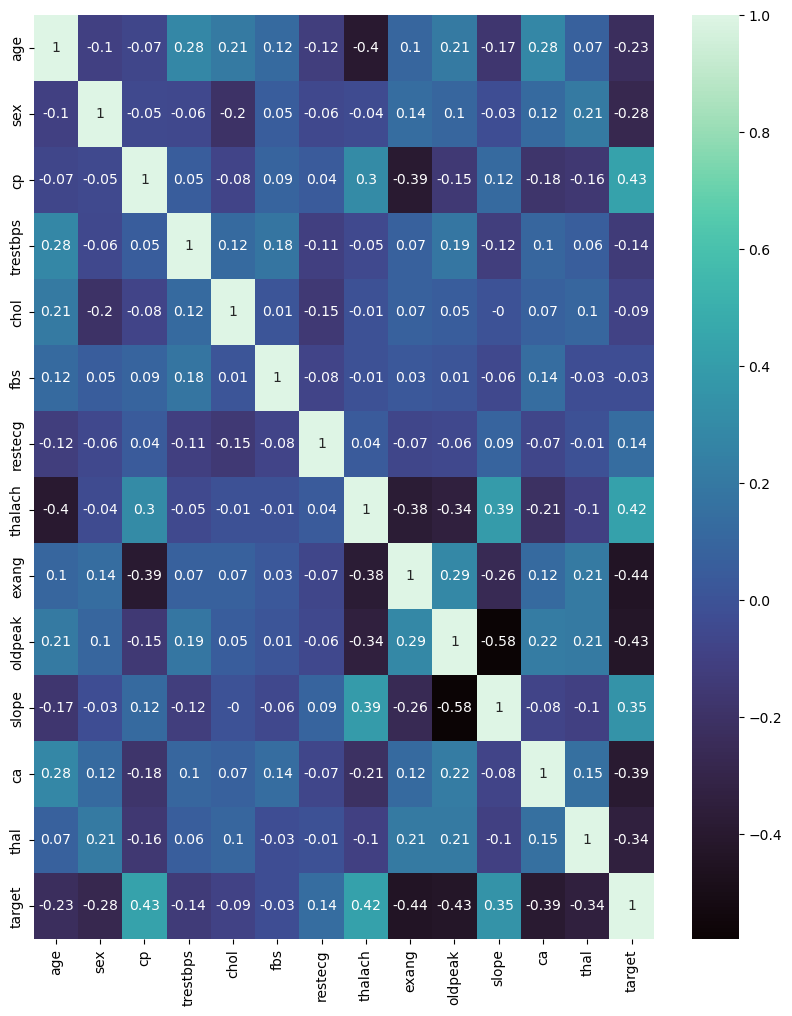

In [18]:
plt.figure(figsize=(10,12))
sns.heatmap(df.corr().round(2),cmap = 'mako',annot = True)
plt.show()

In [19]:
# Fasting blood sugar(FBS),when elevated can increase the risk of heart disease

In [20]:
# Slope "slope" often refers to the ST/HR slope, which is a measure derived from electrocardiogram (ECG) data during exercise stress tests

In [21]:
# "thalach" refers to the maximum heart rate achieved during exercise, specifically measured in beats per minute (bpm)

###### 3.12: Target vs Features


In [22]:
df.corr()['target'].sort_values(ascending = False).reset_index()

index    target
0     target  1.000000
1         cp  0.433798
2    thalach  0.421741
3      slope  0.345877
4    restecg  0.137230
5        fbs -0.028046
6       chol -0.085239
7   trestbps -0.144931
8        age -0.225439
9        sex -0.280937
10      thal -0.344029
11        ca -0.391724
12   oldpeak -0.430696
13     exang -0.436757

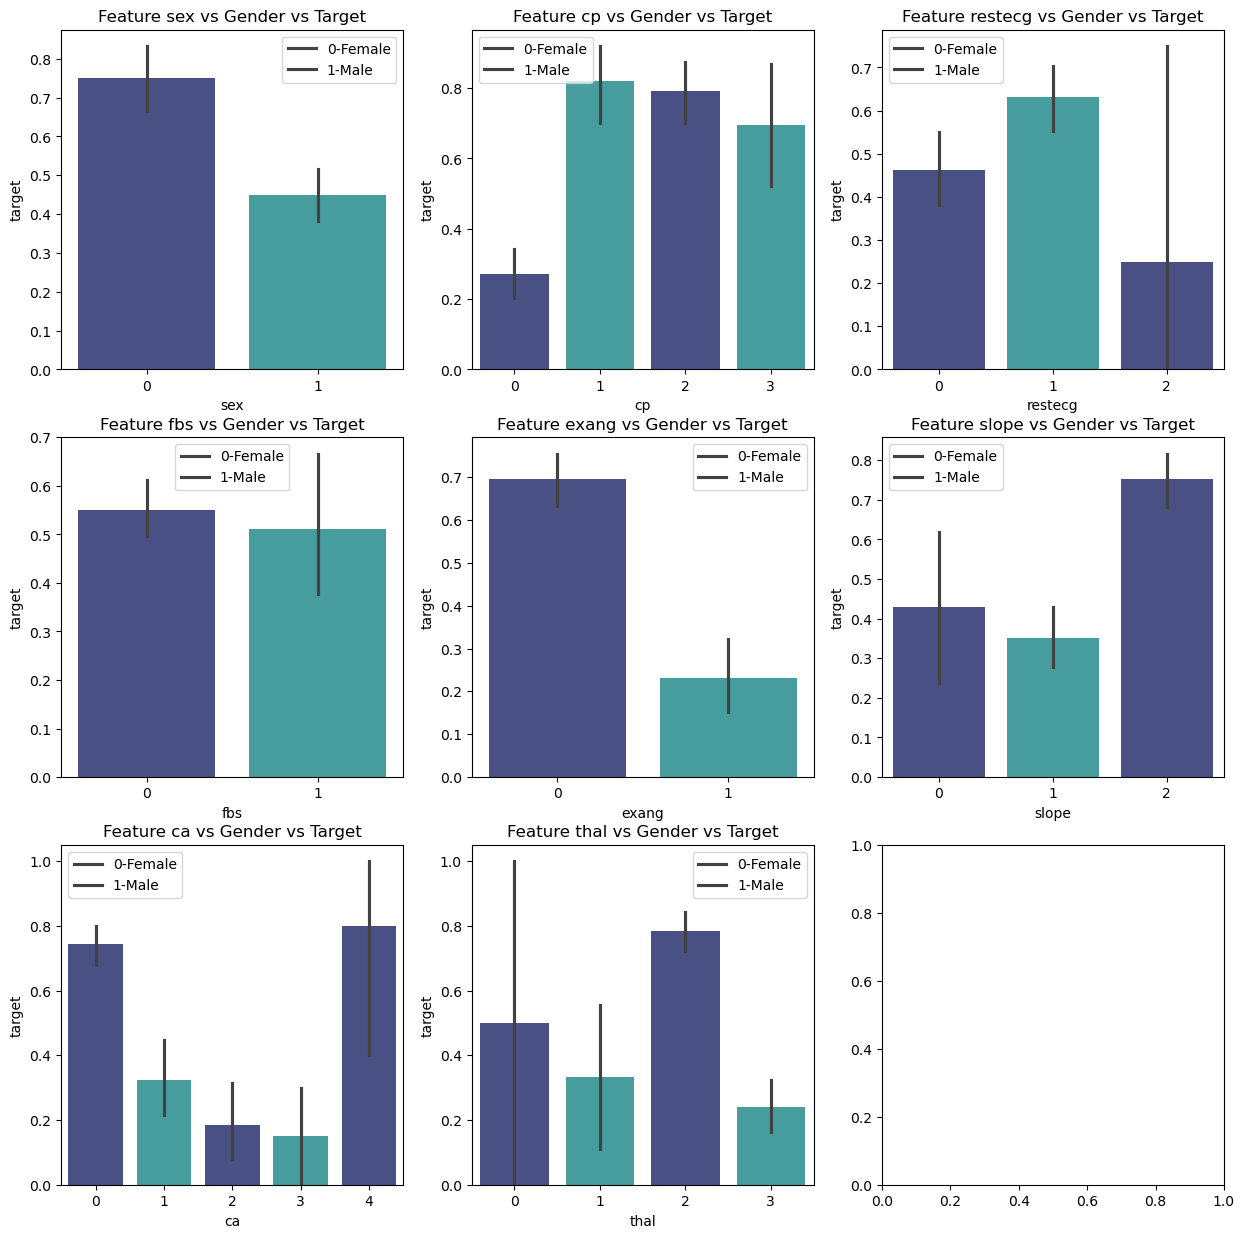

In [23]:
r = 3
c = 3
x_col = ['sex','cp','restecg','fbs','exang','slope','ca','thal']
plt.figure(figsize=(15,15))
for i in range (r*c):
    try:
        plt.subplot(r,c,i+1)
        plt.title(f'Feature {x_col[i]} vs Gender vs Target')
        sns.barplot(data = df , x = x_col[i], y = 'target',palette=sns.color_palette('mako',2))
        plt.legend(['0-Female','1-Male'])
    except:
        pass
plt.show()
        
    

###### 3.13 Pairplot Features vs Target  

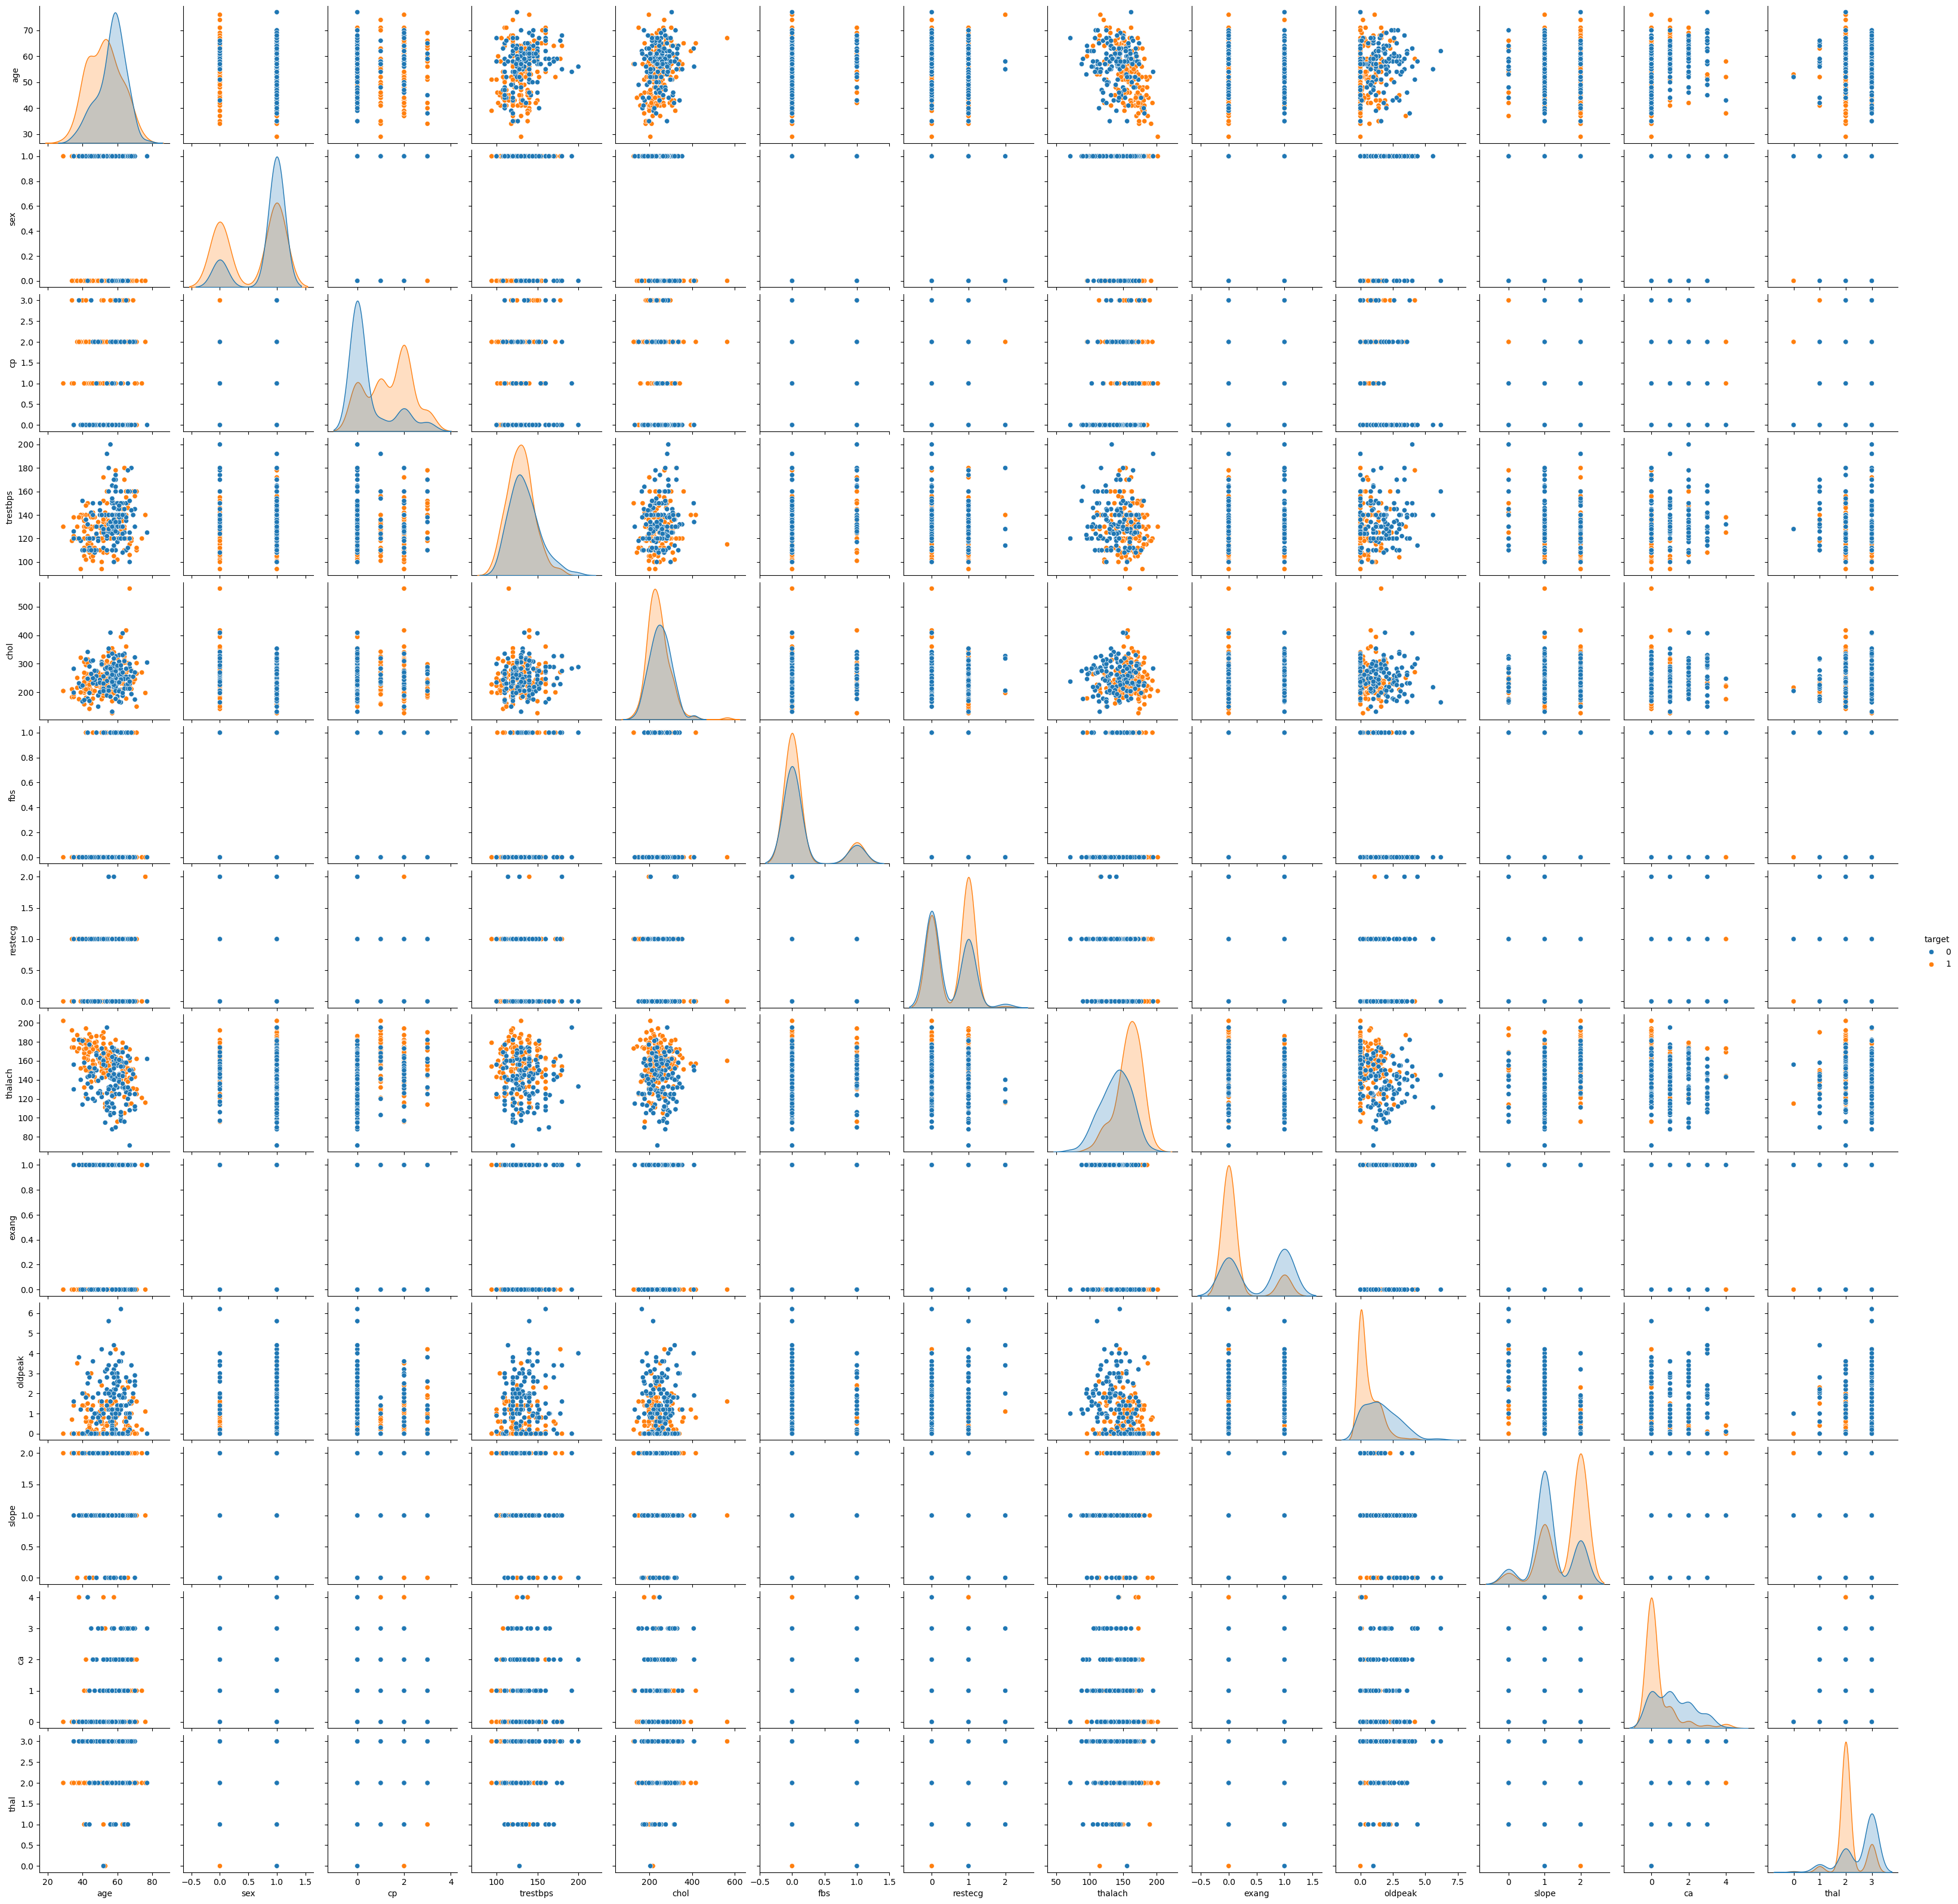

In [24]:
sns.pairplot(data = df ,hue = 'target') # It will take time to open 
plt.show()

# Step-4 Divide Data into Train and Test

###### Train Test split

In [25]:
#4.1 Divide data into Target and Features 
X = df.iloc[:,:-1]
y = df['target']

In [26]:
X.shape,y.shape

((303, 13), (303,))

In [27]:
#4.2 Train - test split
X_train,X_test,y_train , y_test = train_test_split(X,y, test_size = 0.2,random_state = 42)

In [28]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


# Step-5 Multi Model Creation 

In [29]:
# because target value is : only: 0,1 (Binary Classification)
# This is not a regression provlem

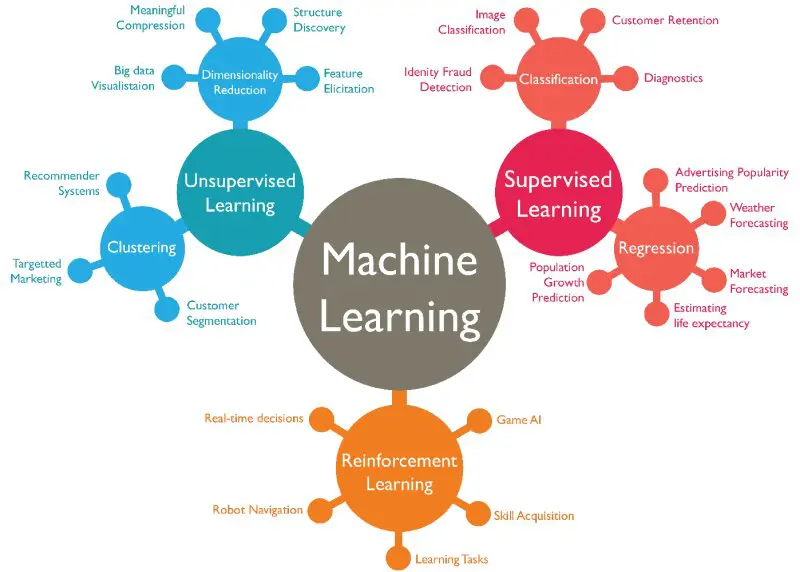

### Step 5.1 Logistic Regression

In [30]:
#It uses the concept of Sigmoid Func: Linear Points Converted to Sigmoid(s) curve 

In [31]:
#z = y_pred
#y_pred = Linear Regression 
#Sigmoid func convert linear line s curve 
#Logistic Regression 

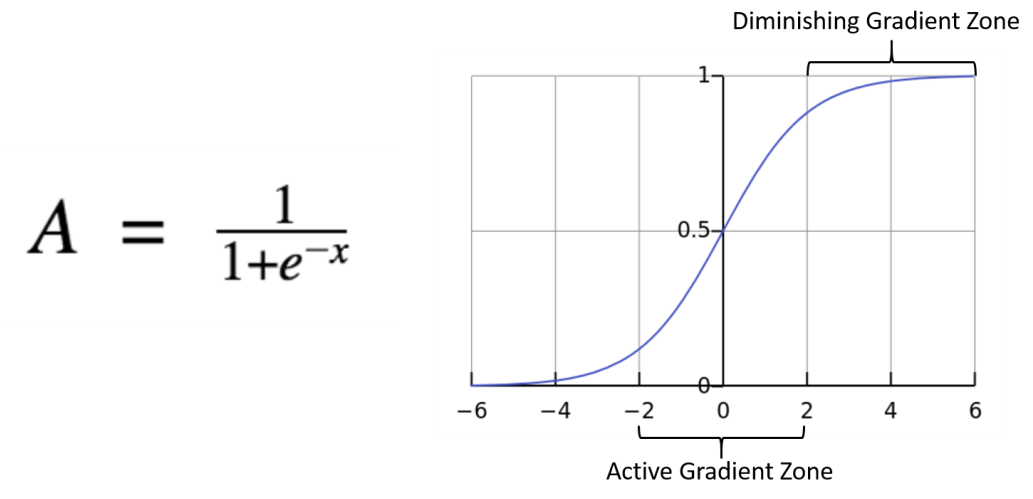

In [32]:
# Logistic regression: We can Solve Binary and Multiclass Classification 

In [33]:
#step 5.1.1 Import Logistic regression 

In [34]:
from sklearn.linear_model import LogisticRegression 
model_lr =  LogisticRegression() #Model object creation 
model_lr.fit(X_train,y_train) #Model Training/Building # Learn pattern in this step

LogisticRegression()

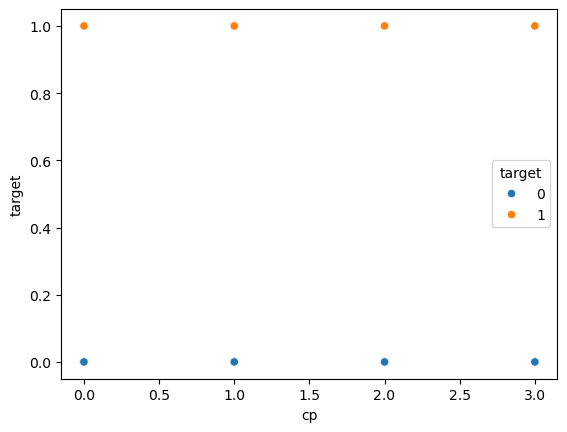

In [35]:
sns.scatterplot(data = df, x ='cp' , y = 'target' , hue ='target')
plt.show()

In [36]:
y_pred = model_lr.predict(X_test)
# y_pred 

In [37]:
#5.1.2 Importm model evaluation metrices 
# It will be called only when problem is of classification 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [38]:
# Step 5.1.3 Import Confusion Matrix to Evaluate classification Model 
from sklearn.metrics import confusion_matrix 

In [39]:
#Error: comparison: If score tie b/w model 
# Type1, Type2: Type1 Error danger  

In [40]:
cm = confusion_matrix(y_test,y_pred)

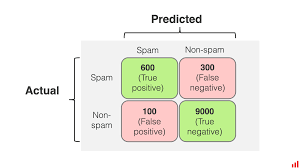

In [41]:
print(cm)

[[25  4]
 [ 3 29]]


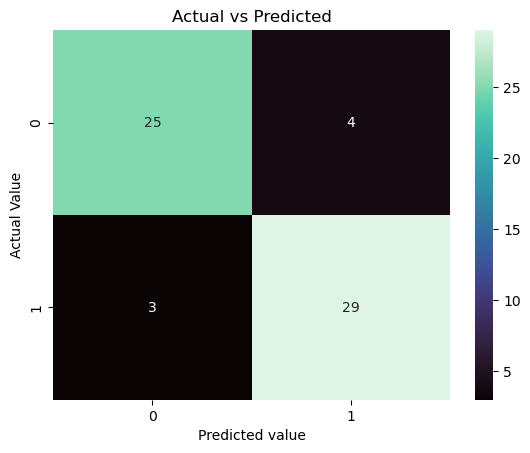

In [42]:
plt.title('Actual vs Predicted')
sns.heatmap(cm,annot = True, cmap = 'mako')
plt.xlabel('Predicted value')
plt.ylabel('Actual Value')
plt.show()

In [43]:
cm

array([[25,  4],
       [ 3, 29]])

In [44]:
cm.ravel()

array([25,  4,  3, 29])

In [45]:
TN,FP,FN,TP=cm.ravel()

In [46]:
ps = (TP)/(TP+FP)
print(ps)

0.8787878787878788


In [47]:
print(precision_score(y_test,y_pred))

0.8787878787878788


In [48]:
acs = (TN + TP)/cm.sum()
print(acs)

0.8852459016393442


In [49]:
lr= (accuracy_score(y_test,y_pred))
print(lr)

0.8852459016393442


In [50]:
rs = recall_score(y_test,y_pred)
print('Recall Score is ',rs)

Recall Score is  0.90625


In [51]:
# f1 score to Evaluate both Precision and Recall Score 

In [52]:
f1_sc = f1_score(y_test,y_pred)

In [53]:
print('F1 score',f1_sc)

F1 score 0.8923076923076924


In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [55]:
#5.1.4 Checking Model Score 
# Model Score same as accuracy Score 
model_lr.score(X_test,y_test)

0.8852459016393442

### Step 5.2: Naive Bayes ML Model 

In [56]:
# pre assumption: It will pre-assume No correlation b/w features 

###### Step 5.2.1 Import Naive Model 

In [57]:
from sklearn.naive_bayes import GaussianNB
# GuassianNB only be use in case of binary classification 
# Multinomial: only be use in case of Multi class classification 
model_nv = GaussianNB()
model_nv.fit(X_train,y_train) # Train / part Training 

GaussianNB()

In [58]:
y_pred = model_nv.predict(X_test)

In [59]:
nv_score = model_nv.score(X_test,y_test)
print('Naive Bayes Score',nv_score)

Naive Bayes Score 0.8688524590163934


In [60]:
print('Accuracy Score:',accuracy_score(y_test,y_pred)),
print('precision Score:',precision_score(y_test,y_pred)),
print('Recall Score:',recall_score(y_test,y_pred)),
print('f1 Score :',f1_score(y_test,y_pred))

Accuracy Score: 0.8688524590163934
precision Score: 0.9
Recall Score: 0.84375
f1 Score : 0.8709677419354839


In [61]:
nv_score = accuracy_score(y_test,y_pred)

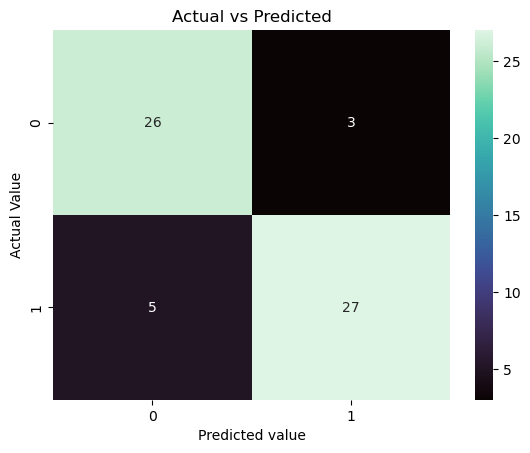

In [62]:
cm = confusion_matrix(y_test,y_pred)
plt.title('Actual vs Predicted')
sns.heatmap(cm,annot = True, cmap = 'mako')
plt.xlabel('Predicted value')
plt.ylabel('Actual Value')
plt.show()

In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



# Step 5.3: Support Vector Machine  ML Model 

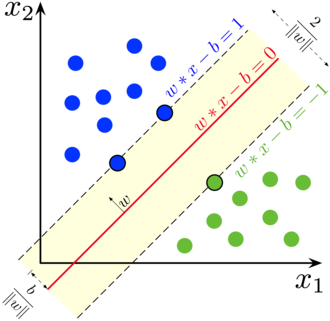

In [64]:
#SVM works on support vectors of nearest data points of different classes 
# IT will create line , plane or Hyperplane 
# we can use this for both regression problems and classification(Binary)

###### Step5.3.1 Import SVM Module 

In [65]:
from sklearn.svm import SVC 
model_svc = SVC()
model_svc.fit(X_train,y_train)

SVC()

###### Step 5.3.2 Predict X_test

In [66]:
y_pred = model_svc.predict(X_test)

###### Step 5.3.3 Checking Scores and confusion Matrix 

In [67]:
print('Accuracy Score:',accuracy_score(y_test,y_pred)),
print('precision Score:',precision_score(y_test,y_pred)),
print('Recall Score:',recall_score(y_test,y_pred)),
print('f1 Score :',f1_score(y_test,y_pred))

Accuracy Score: 0.7049180327868853
precision Score: 0.6666666666666666
Recall Score: 0.875
f1 Score : 0.7567567567567568


In [68]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.52      0.62        29
           1       0.67      0.88      0.76        32

    accuracy                           0.70        61
   macro avg       0.73      0.70      0.69        61
weighted avg       0.73      0.70      0.69        61



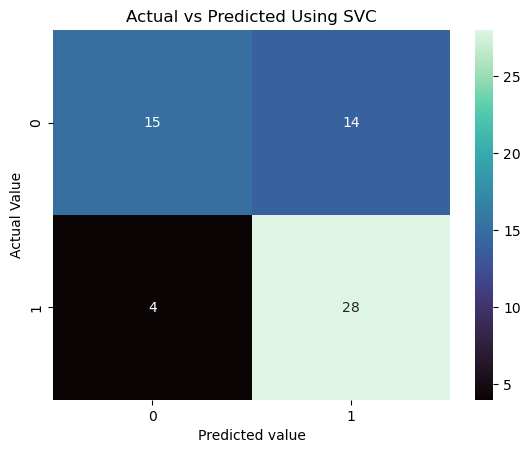

In [69]:
cm = confusion_matrix(y_test,y_pred)
plt.title('Actual vs Predicted Using SVC')
sns.heatmap(cm,annot = True, cmap = 'mako')
plt.xlabel('Predicted value')
plt.ylabel('Actual Value')
plt.show()

In [70]:
svm = accuracy_score(y_test,y_pred)

In [71]:
lr

0.8852459016393442

In [72]:
svm

0.7049180327868853

In [73]:
nv_score

0.8688524590163934

# Step 5.4 Decison Tree ML Model

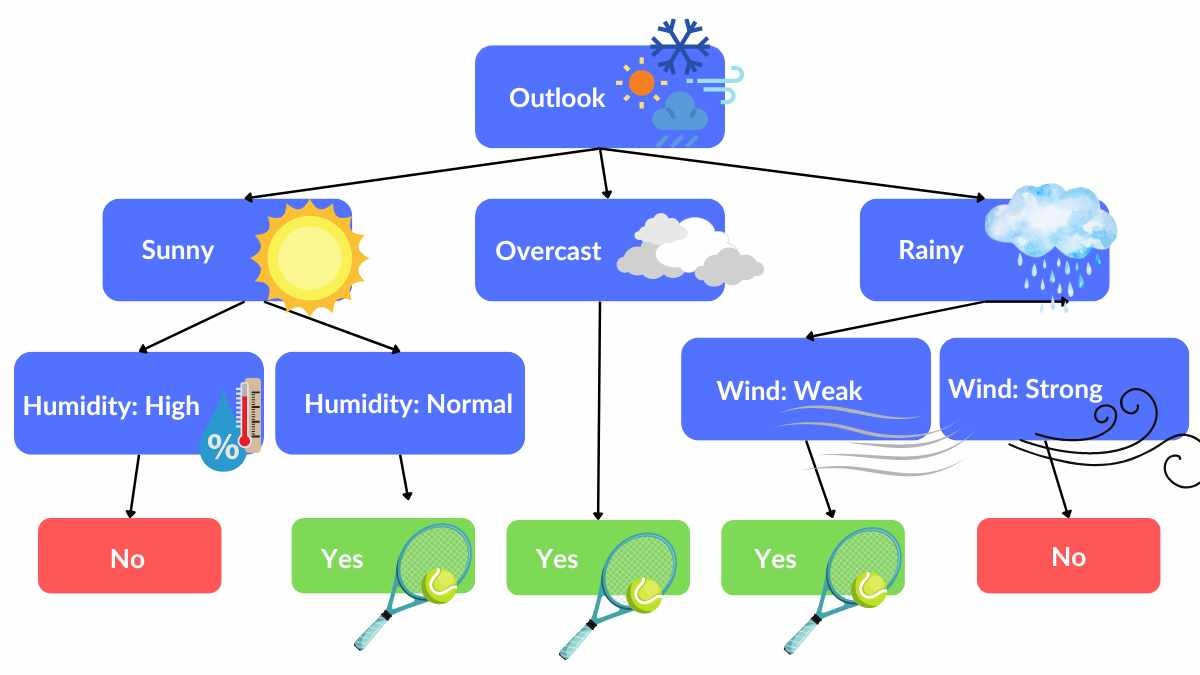

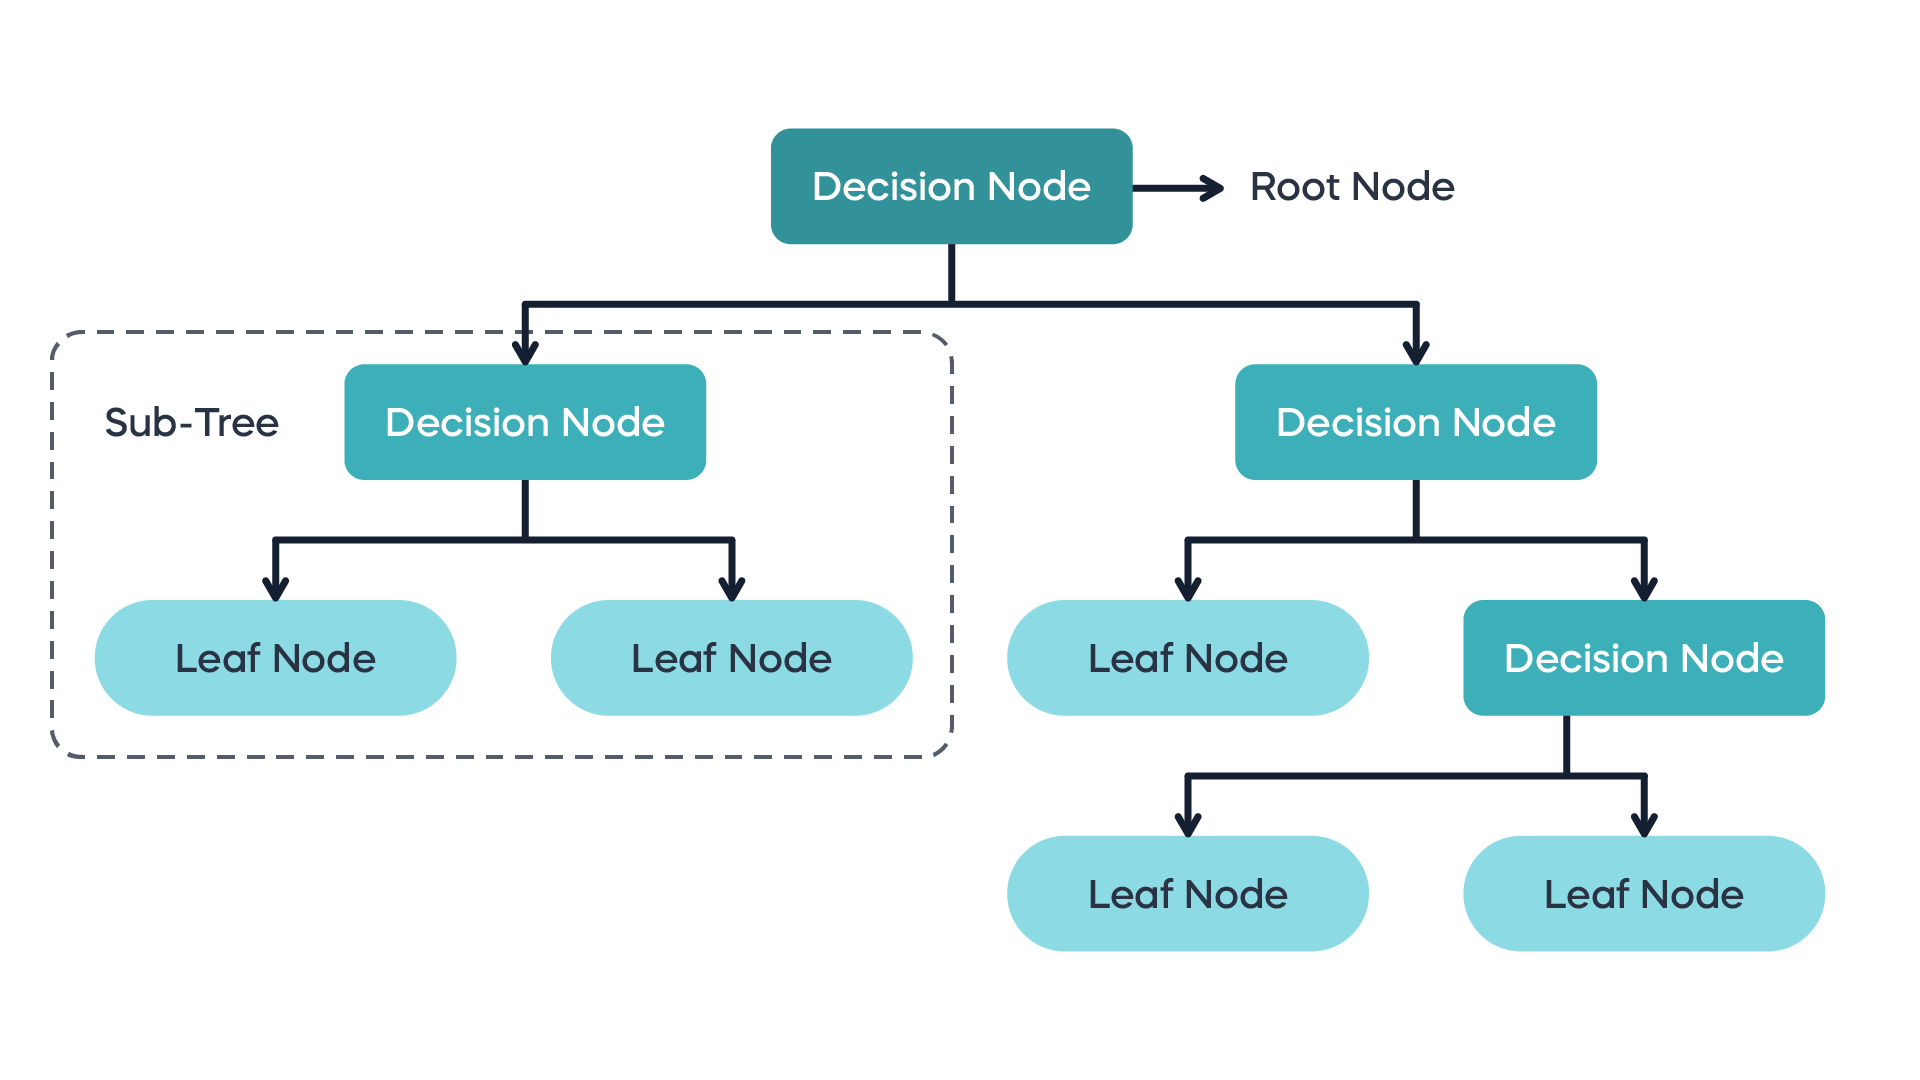

In [74]:
#iris flower has four information 
#sepal length
#sepal width 
#petal Length
#petal width 
# Species of iris flower 
#iris Versicolor
#iris Setosa 
#iris Virginica

###### Step 5.4.1 Import Decision Tree Model

In [75]:
from sklearn.tree import DecisionTreeClassifier

In [76]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,y_train)

DecisionTreeClassifier()

###### Step5.4.2 Model predict 

In [77]:
y_pred = model_dt.predict(X_test)

In [78]:
print('Accuracy Score:',accuracy_score(y_test,y_pred)),
print('precision Score:',precision_score(y_test,y_pred)),
print('Recall Score:',recall_score(y_test,y_pred)),
print('f1 Score :',f1_score(y_test,y_pred))

Accuracy Score: 0.7868852459016393
precision Score: 0.88
Recall Score: 0.6875
f1 Score : 0.7719298245614035


In [79]:
dt_score = accuracy_score(y_test,y_pred)

In [80]:
from sklearn.tree import plot_tree



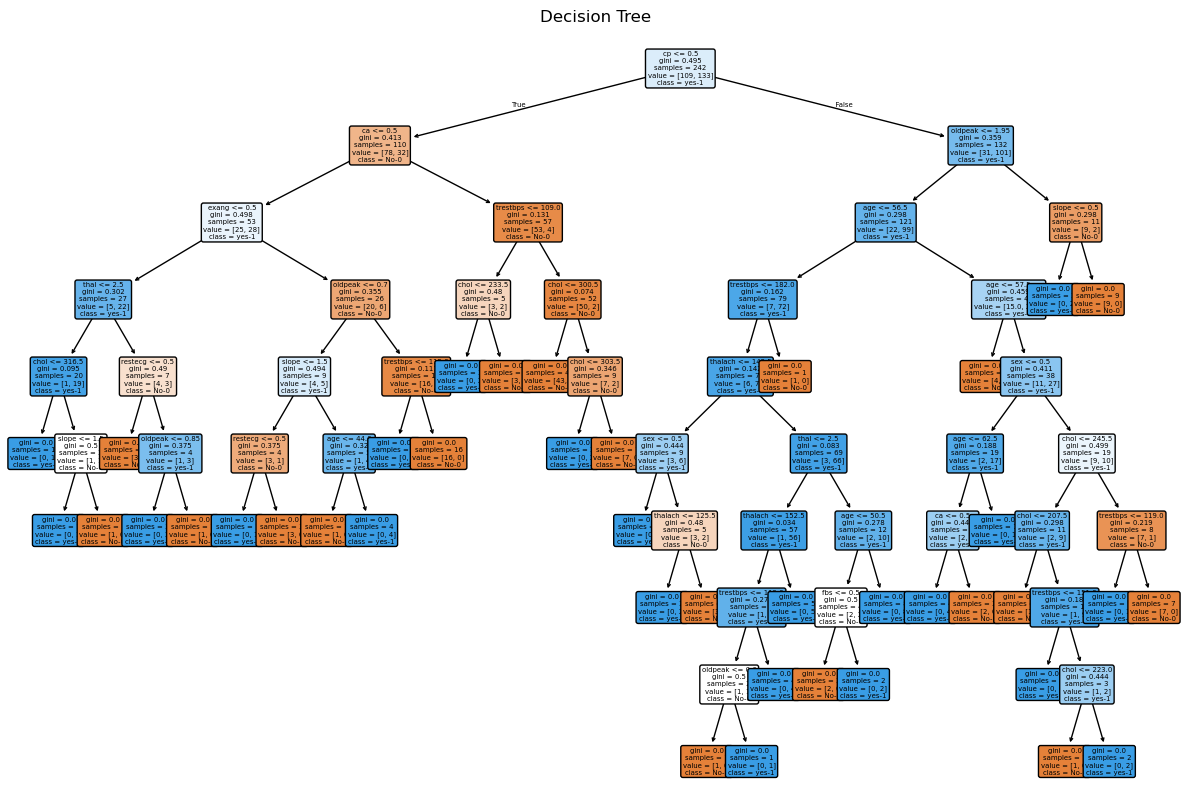

In [81]:
plt.figure(figsize=(15,10))
plot_tree(model_dt,
          feature_names = X.columns,
          class_names = ['No-0','yes-1'],
          filled = True,
          rounded = True,
          fontsize = 5)
plt.title('Decision Tree')
plt.show()
          

In [82]:
dt_score

0.7868852459016393

# Step 5.5 Ensemble ML Model 
- Bagging / Parallel Technique: Bags of Multiple model give its prediction/classification , final outcome based on majority 
- Boosting / Sequential Technique: Next Model learn from previous model and boost it to minimum error and gives us improved score 

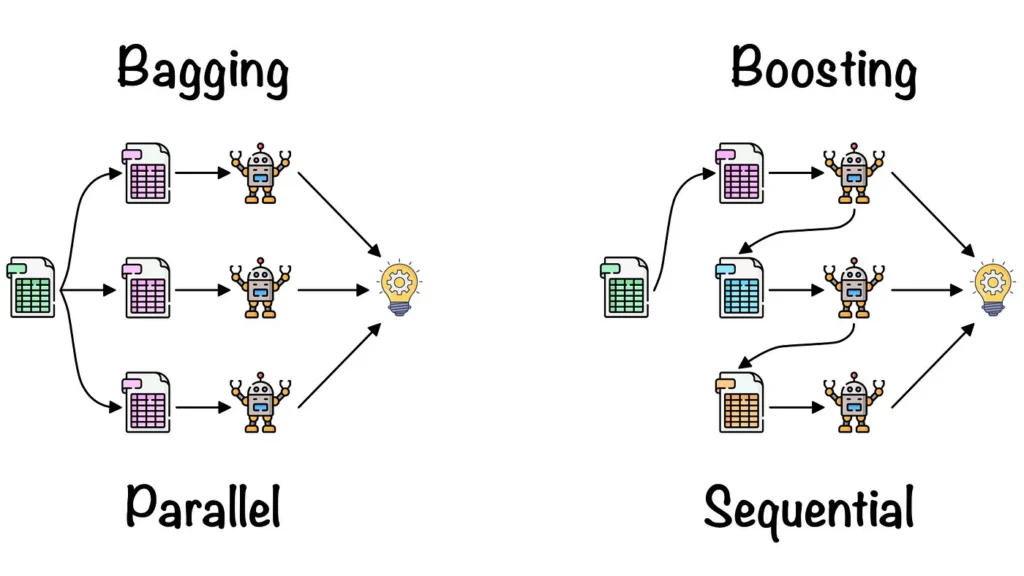

# Step 5.5.1 Bagging Technique Model >> Random Forest ML Model 

In [83]:
# Random Forest: Bags of Multiple Decision Trees Models
# Default Trees = 100 
# Bagging Technique (Ensemble)

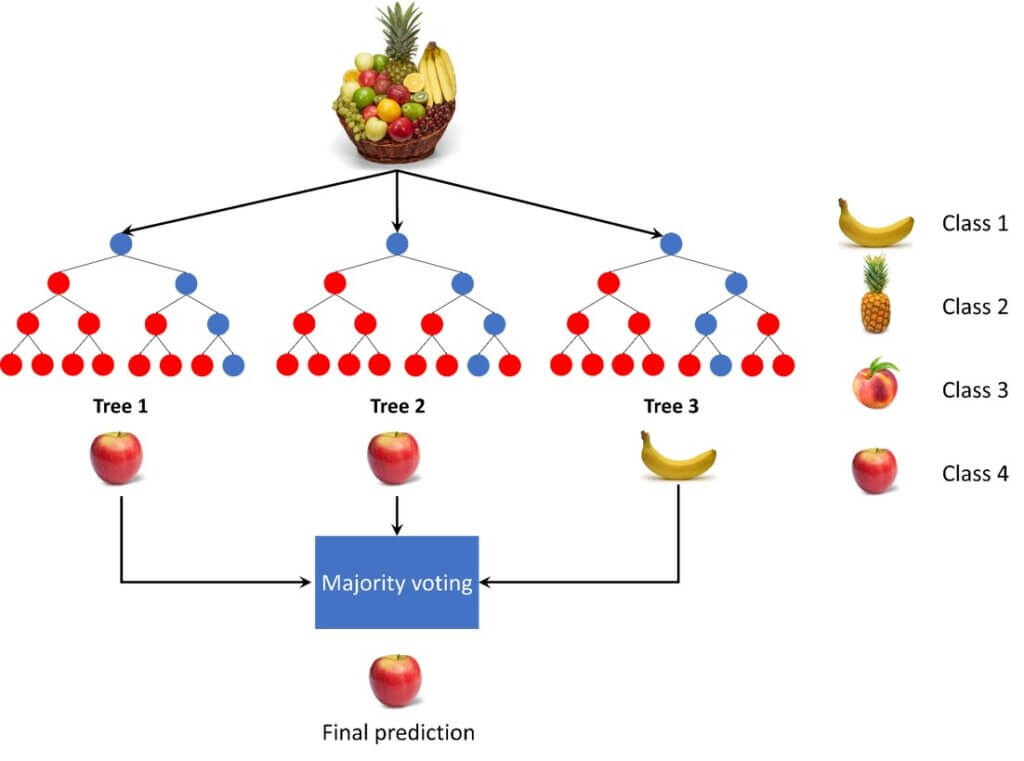

In [84]:
# Random Forest Regression problem : Avg of Final value>> 2.2 + 2.4 + 2.5 >> 2.36 
# Random Forest Classification>>Binary/Multiclass classification >> Majority Voting 

###### Step 5.5.2 Import Random Forest Model 

In [85]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators = 200) #Parameter change Default tree 100 to 200 
model_rf.fit(X_train,y_train) #Learning 

RandomForestClassifier(n_estimators=200)

###### Step 5.5.3 y_pred prediction based on X_test

In [86]:
y_pred = model_rf.predict(X_test)

In [87]:
print('Accuracy Score:',accuracy_score(y_test,y_pred)),
print('precision Score:',precision_score(y_test,y_pred)),
print('Recall Score:',recall_score(y_test,y_pred)),
print('f1 Score :',f1_score(y_test,y_pred))

Accuracy Score: 0.8688524590163934
precision Score: 0.8529411764705882
Recall Score: 0.90625
f1 Score : 0.8787878787878788


In [88]:
rf_score = accuracy_score(y_test,y_pred)

In [89]:
rf_score

0.8688524590163934

In [90]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



###### Step 5.5.4 Confusion_matrix

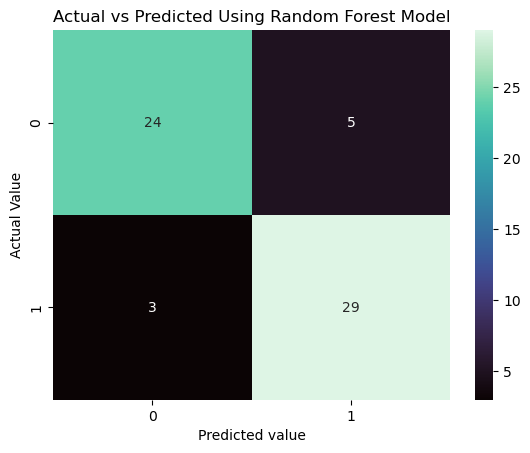

In [91]:
cm = confusion_matrix(y_test,y_pred)
plt.title('Actual vs Predicted Using Random Forest Model')
sns.heatmap(cm,annot = True, cmap = 'mako')
plt.xlabel('Predicted value')
plt.ylabel('Actual Value')
plt.show()

### Step 5.6 Ensemble Boosting Technique: Adaboost, Gradientboost, XGboost

In [92]:
#Adaboost: Adaptive Boosting 
#Gradientboost: GBM 
#LBM: Gradientboost: LGBM 
#XGboost: Extreme Gradient Boosting:
#Catboost: Categorical: Textual Data

In [93]:
#XGboost: Extreme Gradient Boosting:

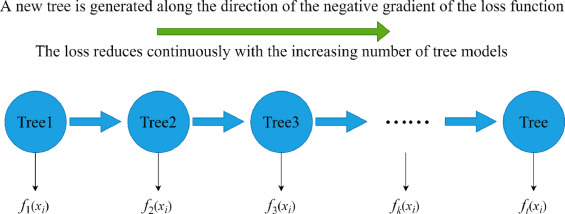

### Step 5.6.1: import XGboost Ml Algorithm

In [94]:
#pip install xgboost

In [95]:
import xgboost
print('Done')

Done


In [96]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier() #learning rate,Objective = binary,logistic, randomstate = 42 = Hyperparameter by default: none 
model_xgb.fit(X_train,y_train) #NONE: Hyperparameter: Model Fine Tune 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [97]:
y_pred = model_xgb.predict(X_test)

In [98]:
print('Accuracy Score:',accuracy_score(y_test,y_pred)),
print('precision Score:',precision_score(y_test,y_pred)),
print('Recall Score:',recall_score(y_test,y_pred)),
print('f1 Score :',f1_score(y_test,y_pred))

Accuracy Score: 0.819672131147541
precision Score: 0.8620689655172413
Recall Score: 0.78125
f1 Score : 0.819672131147541


In [99]:
Xgb_score = accuracy_score(y_test,y_pred)

In [100]:
Xgb_score

0.819672131147541

In [101]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.86      0.78      0.82        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



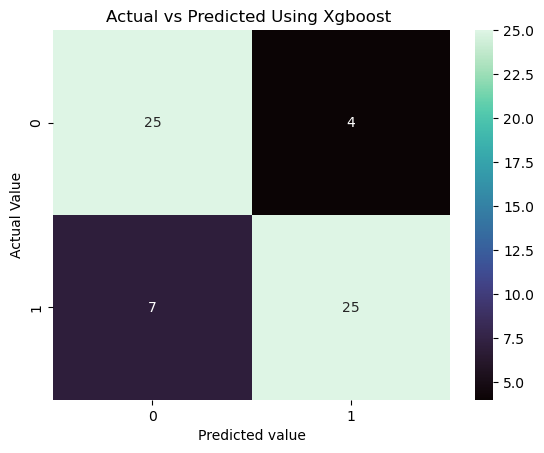

In [102]:
cm = confusion_matrix(y_test,y_pred)
plt.title('Actual vs Predicted Using Xgboost ')
sns.heatmap(cm,annot = True, cmap = 'mako')
plt.xlabel('Predicted value')
plt.ylabel('Actual Value')
plt.show()

## Step 5.7 KNN: Regression and Classification 

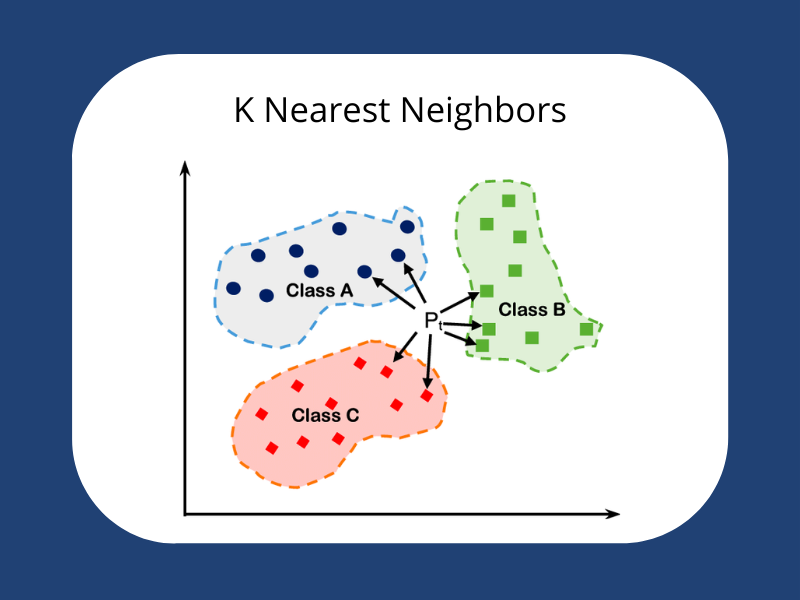

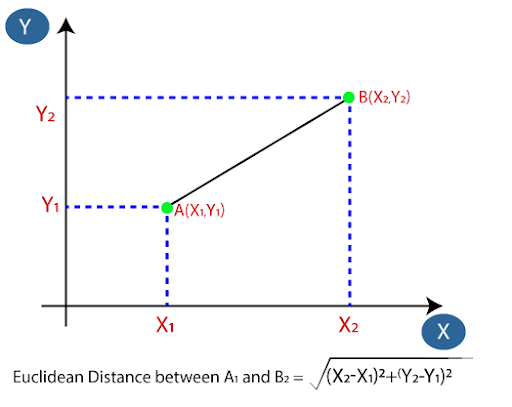

# Step5.7.1: Import KNN 

In [103]:
from sklearn.neighbors import KNeighborsClassifier

In [104]:
model_knn = KNeighborsClassifier(n_neighbors=14)
model_knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=14)

In [105]:
y_pred = model_knn.predict(X_test)

In [106]:
print('Accuracy Score:',accuracy_score(y_test,y_pred)),
print('precision Score:',precision_score(y_test,y_pred)),
print('Recall Score:',recall_score(y_test,y_pred)),
print('f1 Score :',f1_score(y_test,y_pred))

Accuracy Score: 0.7377049180327869
precision Score: 0.7666666666666667
Recall Score: 0.71875
f1 Score : 0.7419354838709677


In [107]:
knn_score = accuracy_score(y_test,y_pred)

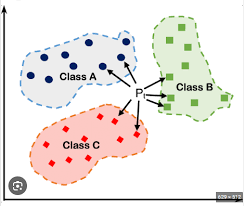

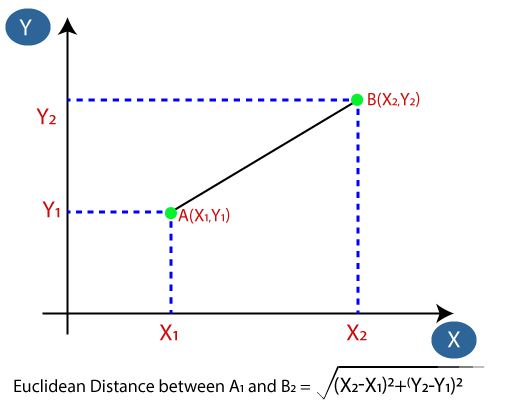

In [108]:
knn_score 

0.7377049180327869

In [109]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.76      0.73        29
           1       0.77      0.72      0.74        32

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



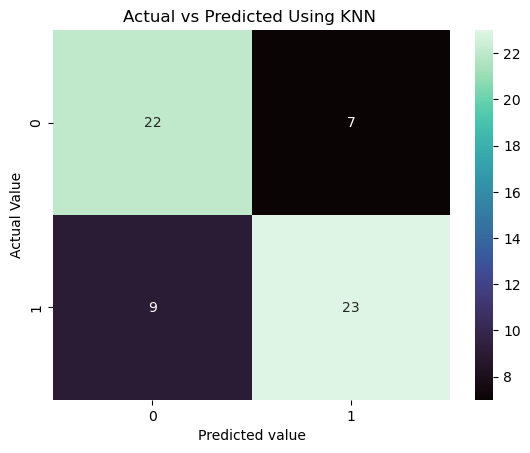

In [110]:
cm = confusion_matrix(y_test,y_pred)
plt.title('Actual vs Predicted Using KNN ')
sns.heatmap(cm,annot = True, cmap = 'mako')
plt.xlabel('Predicted value')
plt.ylabel('Actual Value')
plt.show()

# Step 5.8 Artificial Neural Network Using Deep Learning 

In [111]:
# ML works only on limited data 
# If Input Changes ML Model Fail (8 Features col: 8)

In [112]:
# Deep learning: dense(Deep) Neural network : trained on multiple possibilitites 

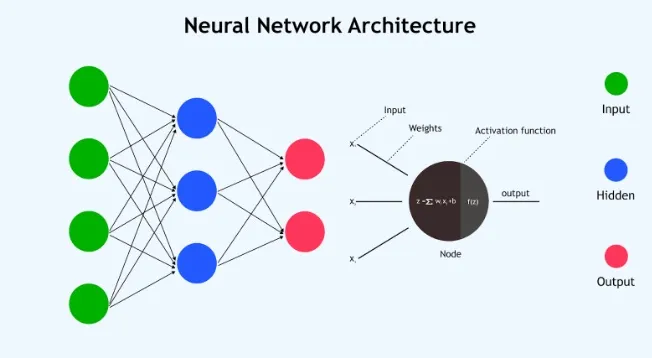

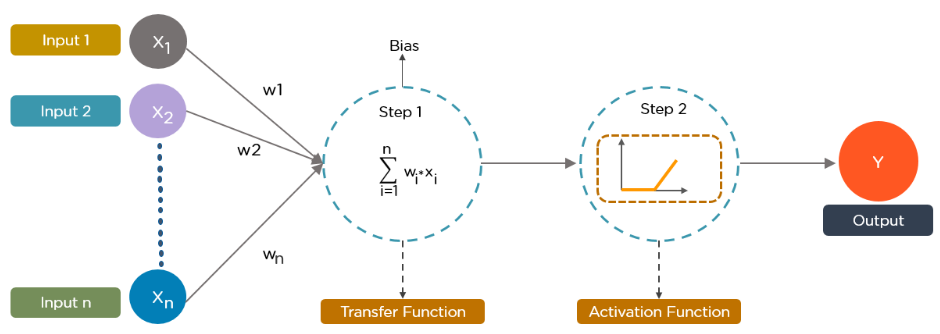

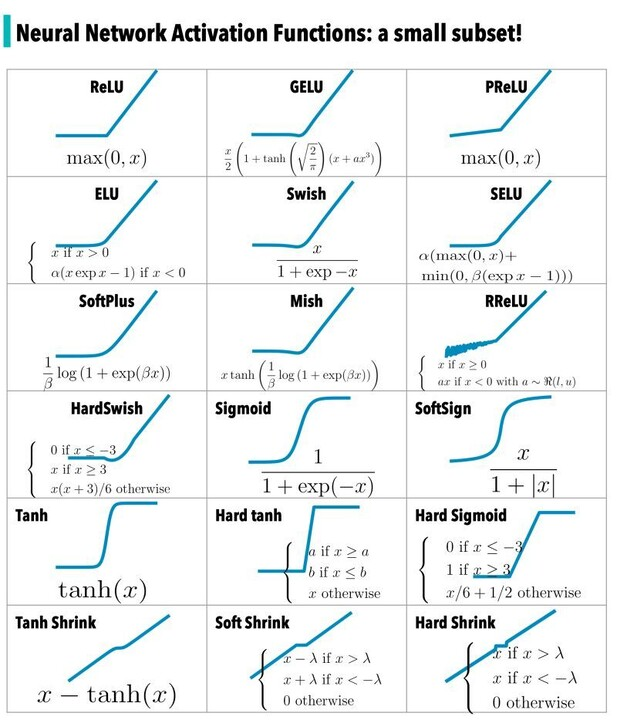

In [113]:
# keras tensor flow:
#tensors: Array


# Step 5.8.1 ANN Model Creation 

In [114]:
#pip install keras

In [119]:
#pip install tensorflow

In [116]:
from keras.models import Sequential 
from keras.layers import Dense 


In [117]:
model = Sequential()  # Step 1 Sequential model creation
model.add(Dense(11,activation='relu',input_dim=13)) # Dense Layer
model.add(Dense(1,activation='sigmoid')) # Output will be 1 Neuron for Binary

model.compile(loss='binary_crossentropy',  # loss to calculate model loss
              optimizer='adam', #optimizer to optimize model learning
              metrics=['accuracy'])  #  metrics return accuracy score

print('Done')

Done


###### Step 5.8.3 Model Training

In [120]:
model.fit(X_train,y_train,epochs = 300) #iteration during retaining epochs = 300 

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.5702 - loss: 4.9426
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5950 - loss: 4.1709
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6116 - loss: 4.2307 
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5950 - loss: 3.7729
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6033 - loss: 3.6935
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6116 - loss: 3.5457
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5992 - loss: 3.3474
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5992 - loss: 3.1718
Epoch 9/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6074 - loss: 3.0379
Epoch 10/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5826 - loss: 2.8004
Epoch 11/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5992 - loss: 2.7340
Epoch 12/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5950 - l

###### Step5.8.4 pred y_value

In [121]:
y_pred = model.predict(X_test)
y_pred = [round(i[0]) for i in y_pred]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


In [123]:
from sklearn.metrics import accuracy_score 
ann_score = accuracy_score(y_test,y_pred)
ann_score

0.8688524590163934

# Step 6 All Model Comparison

In [126]:
all_model_score = [lr,nv_score,svm,dt_score,rf_score,Xgb_score,knn_score,ann_score]
model_name = ['Logistic','Naive','SVM','Decision Tree','Random Forest','XGB','KNN','ANN']
print(len(all_model_score))

8


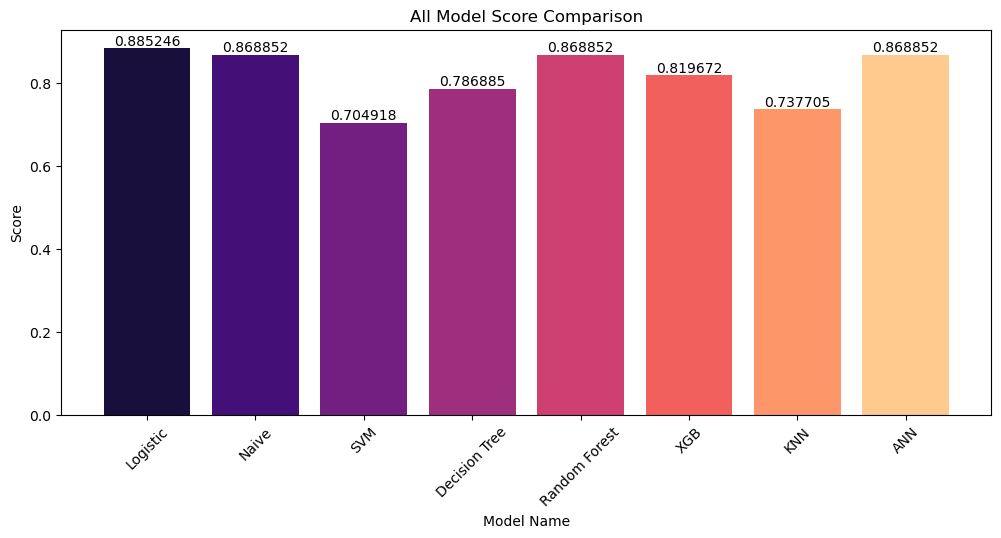

In [128]:
plt.figure(figsize=(12,5))
plt.title('All Model Score Comparison')
ax = plt.bar(x = model_name, height= all_model_score,color = sns.color_palette('magma',8))
plt.bar_label(ax)
plt.xlabel('Model Name')
plt.ylabel('Score')
plt.xticks(rotation = 45)
plt.show()

# Step 7 Best Model Save

In [129]:
#lr has highest score so the Final Model is Logistic Regression 

In [130]:
import pickle 
with open('heart_disease_pred.pkl','wb') as f:
    pickle.dump(model_lr,f)
print('Done')

Done


In [131]:
import os 
os.getcwd()


'C:\\Users\\Khushi Garg\\Heart disease prediction'